In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
#using pandas library and 'read_csv' function to read BlackFriday csv file as file already formated for us from Kaggle
df=pd.read_csv("C:/Users/kenil/Downloads/AB_NYC_2019.csv/AB_NYC_2019.csv")
#examing head of BlackFriday csv file 
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
#checking amount of rows in given dataset to understand the size we are working with
len(df)

48895

In [4]:
#checking type of every column in the dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#dropping columns last_review
df.drop(['last_review'], axis=1, inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [7]:
# changung data type of price from int to float
df['price'] = df['price'].astype(float)


In [8]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [9]:
#replacing all Null values in 'host_name' with A
df.fillna({'host_name':'A'}, inplace=True)
#examing changes
df.host_name.isnull().sum()

0

In [10]:
#replacing all Null values in 'name' with z
df.fillna({'name':'Z'}, inplace=True)
df.host_name.isnull().sum()

0

In [11]:
#check null values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
#df1.to_csv("Airbnb.csv")
df.to_csv ('C:/Users/kenil/Desktop/GBC/SEM 1/PROGRAMMING/final project/Airbnb.csv', index = None, header=True)


In [14]:
#Import the dataset into a SQL database.
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import sqlite3

In [16]:
connection = sqlite3.connect('C:/Users/kenil/Desktop/GBC/SEM 1/PROGRAMMING/final project/Airbnb.db')

In [17]:
df.to_sql('Airbnb',connection,if_exists ='replace')

48895

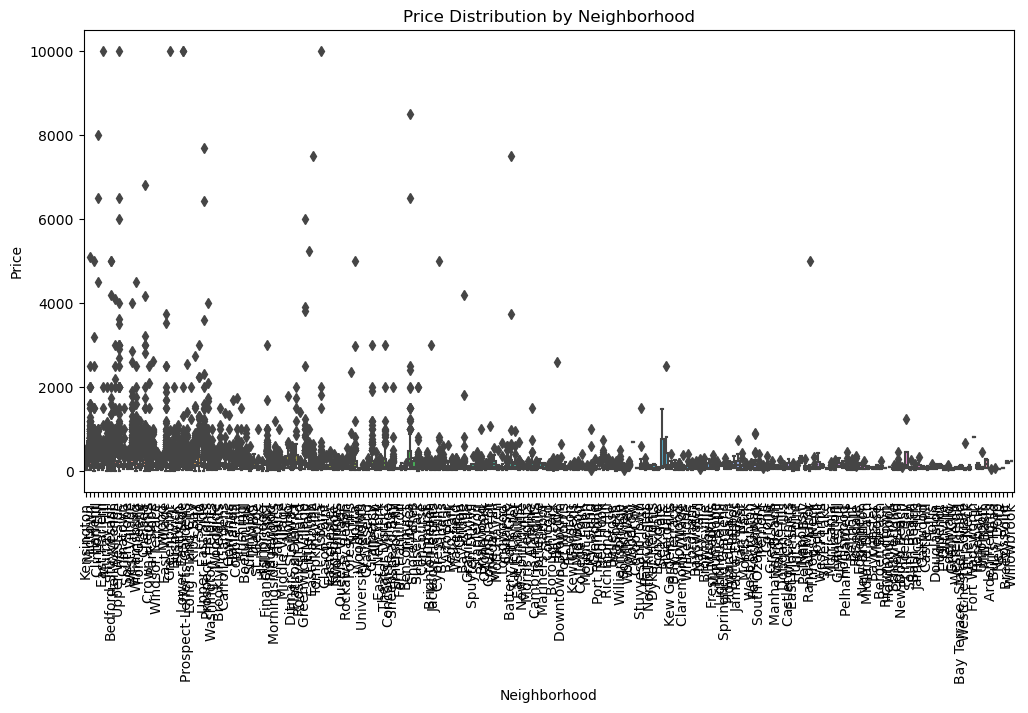

In [18]:
#Visualization of Price Distribution by Neighborhood
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a boxplot for price distribution by neighborhood
sns.boxplot(x='neighbourhood', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()


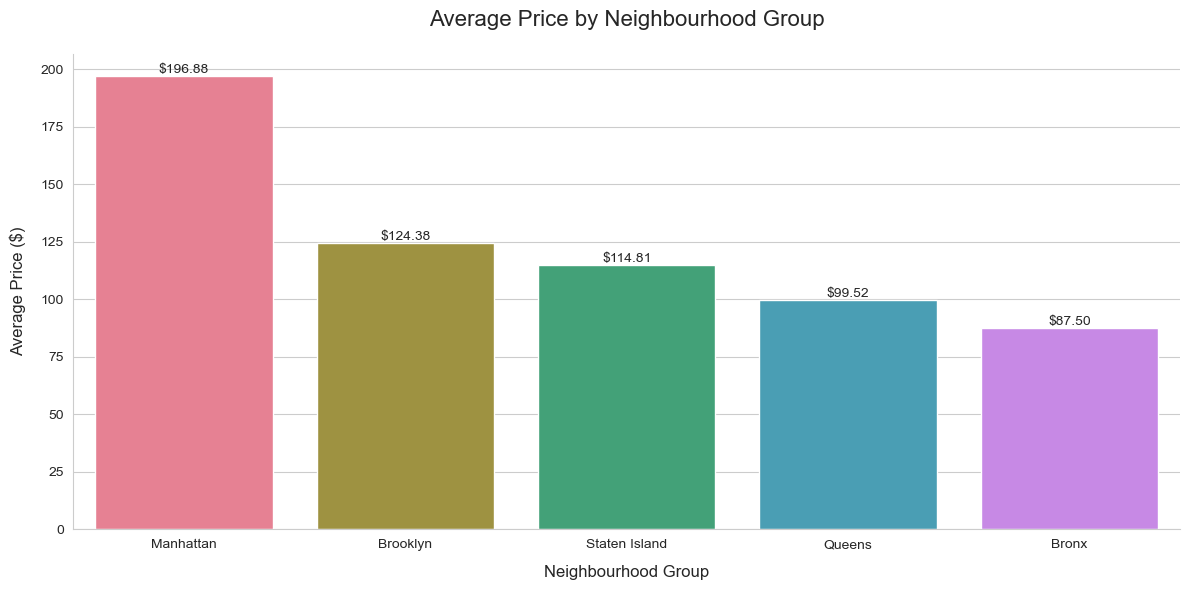

In [19]:
# Calculate the mean price for each neighbourhood_group
neighbourhood_group_avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Set the style and color palette
sns.set_style("whitegrid")
colors = sns.color_palette("husl", len(neighbourhood_group_avg_price))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot
bars = sns.barplot(x=neighbourhood_group_avg_price.index, y=neighbourhood_group_avg_price.values, 
                   palette=colors, ax=ax)

# Customize the plot
ax.set_title('Average Price by Neighbourhood Group', fontsize=16, pad=20)
ax.set_xlabel('Neighbourhood Group', fontsize=12, labelpad=10)
ax.set_ylabel('Average Price ($)', fontsize=12, labelpad=10)
ax.tick_params(axis='x', rotation=0)

# Add value labels on top of each bar
for i, bar in enumerate(bars.patches):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            f'${neighbourhood_group_avg_price.values[i]:,.2f}',
            ha='center', va='bottom', fontsize=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

                     price  neighbourhood  room_type  availability_365
price             1.000000       0.062057  -0.249350          0.081829
neighbourhood     0.062057       1.000000  -0.071964         -0.034655
room_type        -0.249350      -0.071964   1.000000          0.022500
availability_365  0.081829      -0.034655   0.022500          1.000000


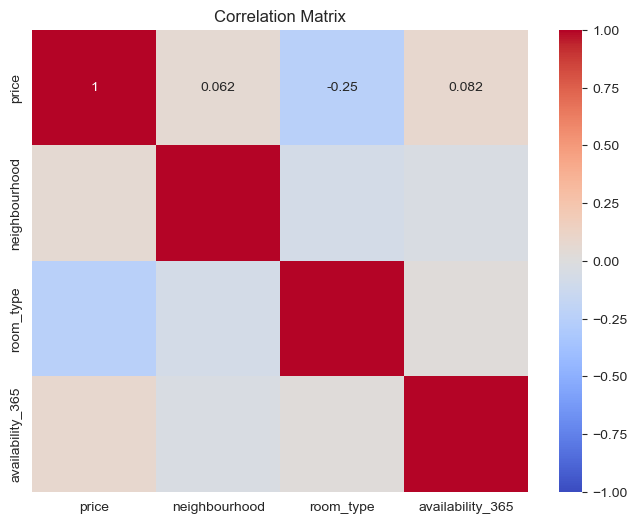

In [20]:
#Correlation Analysis

# Encode categorical variables
df_encoded = df.copy()
df_encoded['neighbourhood'] = df_encoded['neighbourhood'].astype('category').cat.codes
df_encoded['room_type'] = df_encoded['room_type'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df_encoded[['price', 'neighbourhood', 'room_type', 'availability_365']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Clean column names
df.columns = [mystring.replace(" ", "_").replace("(", "").replace(")", "") for mystring in df.columns]

# Correct OLS model specification
results = smf.ols(formula='price ~ neighbourhood + room_type + availability_365', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     27.95
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:59:12   Log-Likelihood:            -3.3444e+05
No. Observations:               48895   AIC:                         6.693e+05
Df Residuals:                   48671   BIC:                         6.713e+05
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [22]:
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

C:\Users\kenil\AppData\Local\Temp\ipykernel_6668\436344858.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]


In [23]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef']]
df

,index,coef
0,Intercept,121.4709
6,neighbourhood[T.Battery Park City],260.8499
25,neighbourhood[T.Brooklyn Heights],94.5945
34,neighbourhood[T.Chelsea],135.7590
41,neighbourhood[T.Clinton Hill],84.0276
43,neighbourhood[T.Cobble Hill],101.8869
64,neighbourhood[T.East Village],88.8709
73,neighbourhood[T.Financial District],95.6378
75,neighbourhood[T.Flatiron District],218.6555
82,neighbourhood[T.Fort Wadsworth],618.6260
